#Time Series Analysis and Forecasting Project

#Defining the Problem

In [144]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Data Importation

In [82]:
#Previewing our Data
df= pd.read_csv('https://bit.ly/3p1QPAv')
df

,datetime,num_orders
0,2018-03-01 00:00:00,9
1,2018-03-01 00:10:00,14
2,2018-03-01 00:20:00,28
3,2018-03-01 00:30:00,20
4,2018-03-01 00:40:00,32
...,...,...
26491,2018-08-31 23:10:00,32
26492,2018-08-31 23:20:00,24
26493,2018-08-31 23:30:00,27
26494,2018-08-31 23:40:00,39


#Data Exploration

In [108]:
#Creating features and downloading the data hourly
data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data.resample('1D').sum()


def make_features(data):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['Datetime'] = data.index.hour


make_features(data)
print(data.head())

            num_orders  year  month  day  dayofweek  Datetime
datetime                                                     
2018-03-01        1364  2018      3    1          3         0
2018-03-02        1506  2018      3    2          4         0
2018-03-03        1290  2018      3    3          5         0
2018-03-04        1141  2018      3    4          6         0
2018-03-05        1259  2018      3    5          0         0


In [109]:
#Checking the data shape
df.shape

(26496, 2)

In [110]:
#Checking for nulls
df.isna().count()

datetime      26496
num_orders    26496
dtype: int64

In [111]:
#Creating More features
data.sort_index(inplace=True)
data = data.resample('1D').sum()


def make_features(data, max_lag):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)


make_features(data, 4)
print(data.head())

            num_orders  year  month  day  ...   lag_1   lag_2   lag_3   lag_4
datetime                                  ...                                
2018-03-01        1364  2018      3    1  ...     NaN     NaN     NaN     NaN
2018-03-02        1506  2018      3    2  ...  1364.0     NaN     NaN     NaN
2018-03-03        1290  2018      3    3  ...  1506.0  1364.0     NaN     NaN
2018-03-04        1141  2018      3    4  ...  1290.0  1506.0  1364.0     NaN
2018-03-05        1259  2018      3    5  ...  1141.0  1290.0  1506.0  1364.0

[5 rows x 10 columns]


#Model Training

In [112]:
def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    data['rolling_mean'] = data['num_orders'].shift().rolling(5).mean()
    # < write code here >

make_features(data, 4, 5)
print(data.head())

            num_orders  year  month  day  ...   lag_2   lag_3   lag_4  rolling_mean
datetime                                  ...                                      
2018-03-01        1364  2018      3    1  ...     NaN     NaN     NaN           NaN
2018-03-02        1506  2018      3    2  ...     NaN     NaN     NaN           NaN
2018-03-03        1290  2018      3    3  ...  1364.0     NaN     NaN           NaN
2018-03-04        1141  2018      3    4  ...  1506.0  1364.0     NaN           NaN
2018-03-05        1259  2018      3    5  ...  1290.0  1506.0  1364.0           NaN

[5 rows x 11 columns]


In [113]:
#train = train.dropna

def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek


    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
        
    data['rolling_mean'] = (
        data['num_orders'].shift().rolling(rolling_mean_size).mean()
    )

# we chose argument values at random
make_features(data, 1, 1)
train, test = train_test_split(data, shuffle=False, test_size=0.2)
train = train.dropna(axis = 0, how = 'any')


print(train.shape)
print(test.shape)

(143, 11)
(37, 11)


In [114]:
data.sort_index(inplace=True)
data = data.resample('1D').sum()


def make_features(data, max_lag, rolling_mean_size):
    data['year'] = data.index.year
    data['month'] = data.index.month
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = (
        data['num_orders'].shift().rolling(rolling_mean_size).mean()
    )


make_features(data, 6, 10)

train, test = train_test_split(data, shuffle=False, test_size=0.2)
train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

model = LinearRegression()
model.fit(features_train, target_train)

pred_train = model.predict(features_train)
pred_test = model.predict(features_test)

print(
    'MAE for the training set:', mean_absolute_error(target_train, pred_train)
)
print('MAE for the test set:', mean_absolute_error(target_test, pred_test))

MAE for the training set: 126.35528899188529
MAE for the test set: 405.86976817372937


#Conclusion- Time Analysis


The MAE for training is lower than that of test thus the training was better. We can increase the parameters for better results.

#Time Series

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17568 entries, 2018-03-01 00:00:00 to 2018-06-30 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  17568 non-null  int64
dtypes: int64(1)
memory usage: 274.5 KB
None


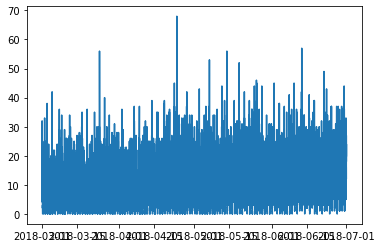

In [140]:
#Time Series and Visualisation
data.sort_index(inplace=True)
data = data['2018-03':'2018-06']
print(data.info())
plt.plot(data)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 48.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 48.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 48.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:1200: UserWarning: Attempting to set identical left == right == 48.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/c

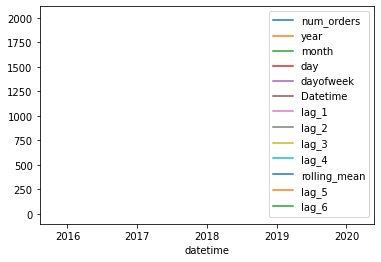

In [116]:
data = data.resample('1Y').mean()
data.plot();

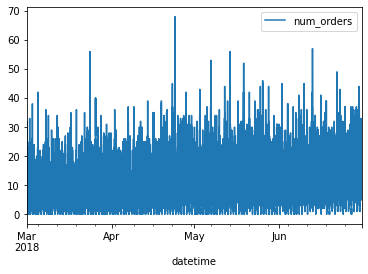

In [139]:
data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data['2018-03':'2018-06']
data.resample('1D').sum()
data.plot() 

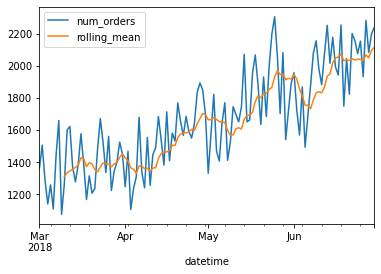

In [141]:
data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data['2018-03':'2018-06'].resample('1D').sum()
data['rolling_mean'] = data.rolling(10).mean()
data.plot()

#Trends and Seasonality

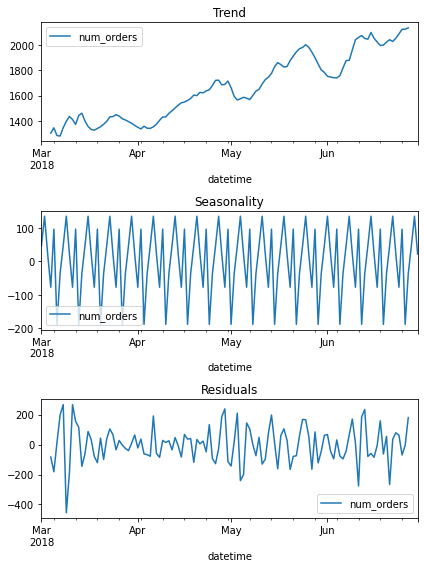

In [146]:
data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data['2018-03':'2018-06'].resample('1D').sum()

decomposed = seasonal_decompose(data)

plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout();

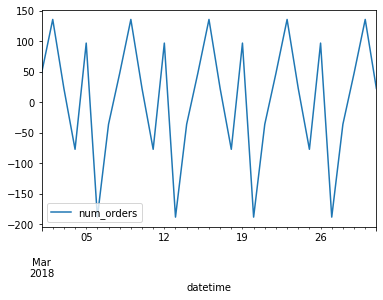

In [148]:
data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data['2018-03':'2018-06'].resample('1D').sum()

decomposed = seasonal_decompose(data)

decomposed.seasonal['2018-03-01':'2018-03-31'].plot()

**Observation**. There was a dip in cab requests on 5th, 12th, 19th and 26th March 2021 which are all Mondays. This means the request for cabs to the airrport on Mondays was low for the month of March.

#Time Series Differences

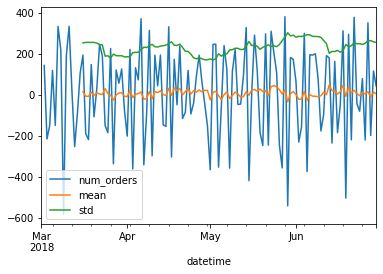

In [150]:
data = pd.read_csv(
    'https://bit.ly/3p1QPAv', index_col=[0], parse_dates=[0]
)
data.sort_index(inplace=True)
data = data['2018-03':'2018-06'].resample('1D').sum()
data = (data-data.shift())
data['mean'] = data['num_orders'].rolling(15).mean()
data['std'] = data['num_orders'].rolling(15).std()
data.plot();

**Observation**: The stationarity of the series improved and thus the data can be forecasted now.